# Técnicas de Pré-processamento para OCR

# Importando as bibliotecas

In [1]:
from PIL import ImageFont, ImageDraw, Image
import pytesseract
import numpy as np
import cv2 # OpenCV
from IPython import display
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Escala de cinza (*grayscale*)

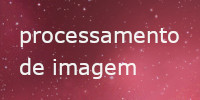

In [3]:
# Imagem original
display.Image('content/Imagens/img-process.jpg')

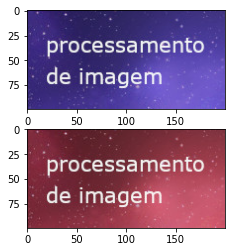

In [4]:
img = cv2.imread('content/Imagens/img-process.jpg') # Imagem em BGR
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(2, 1, 1)
plt.imshow(img)
plt.subplot(2, 1, 2)
plt.imshow(rgb)

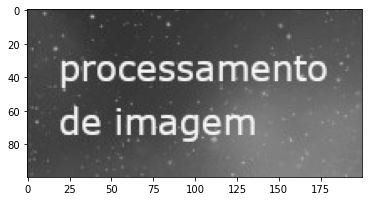

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

Com aplicação de escala de cinza, estamos reduzindo de três canais de cores para um canal. Reduzindo o custo computacional pela redução de atributos.

# Limiarização  (*thresholding*)

- A limiarização, também chamada de binarização, é o método mais simples de segmentação de imagens.
- Consiste em separar uma imagem em regiões de interesse através de um ponto de corte, chamado limiar, ou threshold.

## Limiarização Simples (*Threshold*)

O valor da nova cor que terá o pixel

In [ ]:
img = cv2.imread('/content/trecho-livro.jpg')
cv2_imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
val, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

In [ ]:
val

In [ ]:
val, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

In [ ]:
val, thresh = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

## Método de Otsu

In [ ]:
val, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(otsu)
print(val)

In [ ]:
img = cv2.imread('/content/receita01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, thresh = cv2.threshold(gray, 138, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)

In [ ]:
val, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(otsu)
print(val)

## Limiarização Adaptativa

In [ ]:
img = cv2.imread('/content/livro02.jpg')
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(otsu)
print(val)

In [ ]:
adapt_media = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adapt_media)

## Limiarização Adaptativa Gaussiana

In [ ]:
img = cv2.imread('/content/livro_adaptativa.jpg')
cv2_imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adapt_media_gauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adapt_media_gauss)

In [ ]:
adapt_media = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adapt_media)

# Inversão

In [ ]:
img = cv2.imread('/content/img-process.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
gray

In [ ]:
invert = 255 - gray

In [ ]:
invert

In [ ]:
cv2_imshow(invert)

In [ ]:
cv2_imshow(thresh)

In [ ]:
invert = 255 - thresh
cv2_imshow(invert)

# Redimensionamento

- INTER_NEAREST - uma interpolação de vizinho mais próximo. É muito usado por ser o mais rápido.
- INTER_LINEAR - uma interpolação bilinear (é usada por padrão), boa no geral para aumentar e também pra diminuir imagens.
- INTER_AREA - usa a relação de área de pixel. Pode ser um método preferido para a redução de imagens pois fornece resultados sem moiré (efeito geralmente indesejado na imagem). Mas quando a imagem é ampliada, é semelhante ao método INTER_NEAREST.
- INTER_CUBIC - bicúbica (4x4 pixel vizinhos). Possui resultados melhores.
- INTER_LANCZOS4 - interpolação Lanczos (8x8 pixel vizinhos). Dentre esses algoritmos, é o que apresenta resultados com a melhor qualidade.

In [ ]:
cv2_imshow(gray)

In [ ]:
maior = cv2.resize(gray, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
cv2_imshow(maior)

In [ ]:
menor = cv2.resize(gray, None, fx = 0.5, fy = 0.5, interpolation=cv2.INTER_AREA)
cv2_imshow(menor)

# Operações Morfológicas

In [ ]:
img = cv2.imread('/content/texto-opencv.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

## Erosão

In [ ]:
np.ones((3, 3), np.uint8)

In [ ]:
erosao = cv2.erode(gray, np.ones((3, 3), np.uint8))
cv2_imshow(erosao)

## Dilatação

In [ ]:
dilatacao = cv2.dilate(gray, np.ones((3,3), np.uint8))
cv2_imshow(dilatacao)

## Abertura

In [ ]:
erosao = cv2.erode(gray, np.ones((5, 5), np.uint8))
abertura = cv2.dilate(erosao, np.ones((5,5), np.uint8))
cv2_imshow(gray)
cv2_imshow(erosao)
cv2_imshow(abertura)

## Fechamento

In [ ]:
img = cv2.imread('texto-opencv2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
dilatacao = cv2.dilate(gray, np.ones((5,5)))
fechamento = cv2.erode(dilatacao, np.ones((5,5)))
cv2_imshow(gray)
cv2_imshow(dilatacao)
cv2_imshow(fechamento)

# Remoção de Ruído

## Desfoque com Média

In [ ]:
img = cv2.imread('teste_ruido.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
desfoque_media = cv2.blur(gray, (5,5))
cv2_imshow(desfoque_media)

## Desfoque Gaussiano


In [ ]:
desfoque_gaussiano = cv2.GaussianBlur(gray, (5, 5), 0)
cv2_imshow(desfoque_gaussiano)

## Desfoque com Mediana

In [ ]:
desfoque_mediana = cv2.medianBlur(gray, 3)
cv2_imshow(desfoque_mediana)

## Filtro bilateral

In [ ]:
desfoque_bilateral = cv2.bilateralFilter(gray, 15, 55, 45)
cv2_imshow(desfoque_bilateral)

# Detecção de textos

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
import pytesseract

*Aviso: em setembro de 2021 o link para baixar o **por.traineddata** sofreu uma pequena alteração [ para mais explicações consulte a aula "Resolvendo problema relacionado ao pacote de idiomas" ]*

Portanto, o link final ficou: https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true (segue abaixo o comando completo)

In [ ]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

In [ ]:
cv2_imshow(thresh)

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(thresh, lang='por', config=config_tesseract)
print(texto)

# Exercício

In [ ]:
img = cv2.imread('frase.jpg')
cv2_imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
val, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
print(val)

In [ ]:
invert = 255 - thresh
cv2_imshow(invert)

In [ ]:
print(pytesseract.image_to_string(thresh, lang='por', config=config_tesseract))